# Generate multidimensional meaning spaces

The basic idea is to simulate $n-ball$ meaning spaces by choosing $n$ points from an interval (radius), e.g. [0,1].

In [174]:
import torch
import matplotlib.pyplot as plt

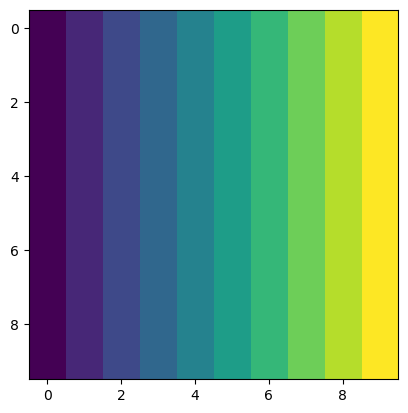

In [175]:
points = torch.linspace(start=0., end=1., steps=10)
plt.imshow(points.expand(10, 10))

In [176]:
# SO: https://stackoverflow.com/questions/10031580/how-to-write-simple-geometric-shapes-into-numpy-arrays

import numpy

# xx and yy are 200x200 tables containing the x and y coordinates as values
# mgrid is a mesh creation helper
xx, yy = numpy.mgrid[:200, :200]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
circle = (xx - 100) ** 2 + (yy - 100) ** 2
# donuts contains 1's and 0's organized in a donut shape
# you apply 2 thresholds on circle to define the shape
donut = (circle < (6400 + 60)) & (circle > (6400 - 60))

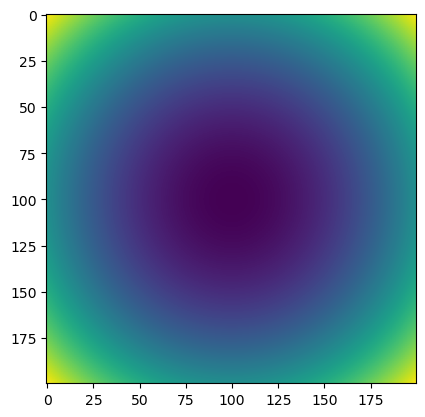

In [177]:
plt.imshow(circle)

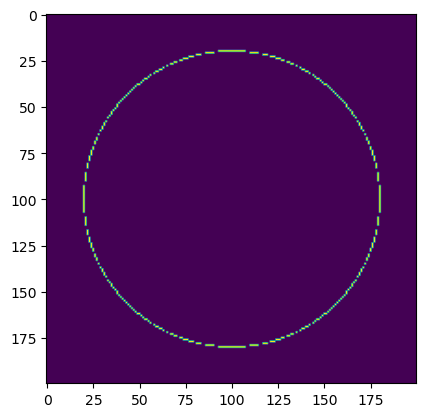

In [178]:
plt.imshow(donut)

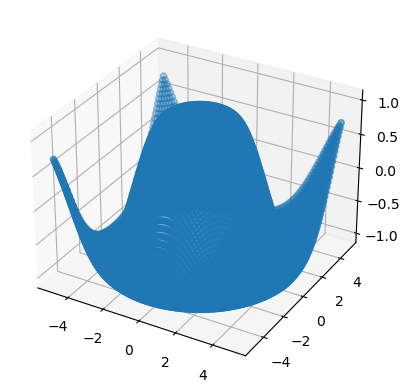

In [179]:
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = torch.sin(torch.sqrt(x * x + y * y))
# z = torch.randn(100, 100)
ax = plt.axes(projection='3d')
# ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
ax.scatter(x.numpy(), y.numpy(), z.numpy())
plt.show()


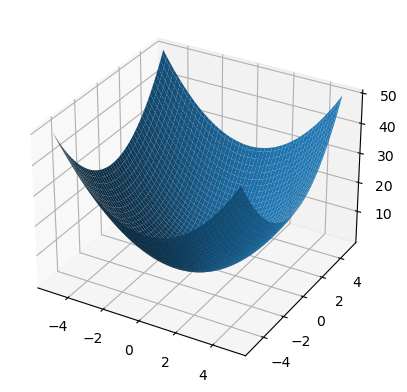

In [180]:
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
z = (x ) ** 2 + (y ) ** 2
ax = plt.axes(projection='3d')
ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
plt.show()

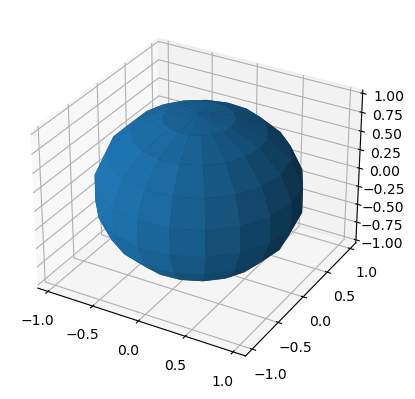

(20, 10)

In [181]:
# draw sphere
import numpy as np
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z)
plt.show()
z.shape

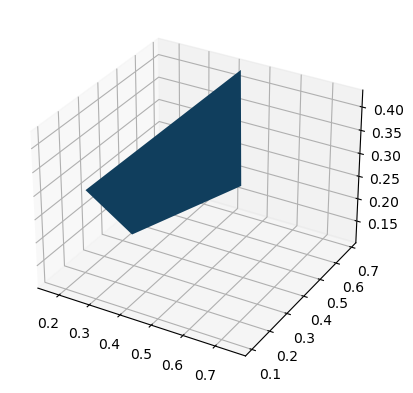

In [182]:
import random

def normalize(v):
    norm = torch.linalg.vector_norm(v)
    if norm == 0: 
       return v
    return v / norm

rad = 2
base_points = torch.linspace(0,1,10)
# points = np.array([normalize(point) for point in points])
get_point = lambda: tuple(random.choice(base_points) for _ in range(rad))
points = [ (get_point(), get_point(), get_point())  for _ in range(rad)]
points = torch.stack([ normalize(torch.tensor(point)) for point in points])



x = np.array(points[:,0])
y = np.array(points[:,1])
z = np.array(points[:,2])
z.shape

ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z)
plt.show()

In [183]:
scalars = np.linspace(0,1,10)
num_points = 100
dim = 3
p = lambda: random.choice(scalars)
points = [ tuple(p() for _ in range(dim) ) for _ in range(num_points) ]
x, y, z = list(zip(*points))
np.array(points)

array([[0.55555556, 0.33333333, 0.33333333],
       [0.        , 0.44444444, 0.11111111],
       [0.22222222, 0.66666667, 0.55555556],
       [0.66666667, 0.88888889, 0.88888889],
       [0.11111111, 1.        , 0.22222222],
       [0.66666667, 0.11111111, 0.77777778],
       [0.77777778, 0.44444444, 0.55555556],
       [0.88888889, 0.22222222, 0.77777778],
       [0.11111111, 0.55555556, 0.55555556],
       [0.66666667, 0.66666667, 0.55555556],
       [0.        , 0.66666667, 0.        ],
       [0.66666667, 0.        , 0.88888889],
       [1.        , 0.88888889, 0.11111111],
       [1.        , 0.33333333, 0.33333333],
       [0.33333333, 1.        , 0.55555556],
       [0.66666667, 1.        , 0.77777778],
       [0.88888889, 0.66666667, 0.55555556],
       [1.        , 0.11111111, 0.77777778],
       [0.88888889, 0.55555556, 0.        ],
       [0.        , 0.11111111, 0.33333333],
       [1.        , 0.66666667, 0.33333333],
       [0.88888889, 0.11111111, 0.55555556],
       [0.

Idea: to get a point inside the sphere, just choose any point between two of the points on the surface of the sphere. This will work because spheres are convex. Of course, the wireframe approximation you generate will break this (e.g., choosing points between any two *closest* points will actually yield a point outside the sphere).


AttributeError: 'tuple' object has no attribute 'numpy'

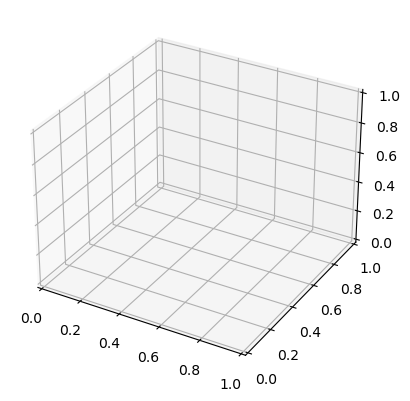

In [184]:
xs = torch.linspace(-5, 5, steps=100)
ys = torch.linspace(-5, 5, steps=100)
x, y = torch.meshgrid(xs, ys, indexing='xy')
# z = torch.sin(torch.sqrt(x * x + y * y))
# z = torch.randn(100, 100)

ax = plt.axes(projection='3d')
# ax.plot_surface(x.numpy(), y.numpy(), z.numpy())
ax.scatter(x.numpy(), y.numpy(), z.numpy())
plt.show()


after alvaro's advice

In [ ]:
# 1. x_1 := sample from [0,1] 
# 2. x_2 := sample from [0,1]
# 3. x_3 := sqrt(1-x_1^2 + x_2^2)


def sample():
   a = 0 + 1e-4
   b = 1 + 1e-4
   sign = np.random.choice([1, -1]) # randomly flip sign
   return sign * (b - a) * np.random.sample() + a

def get_r3_point():
    x_1 = sample()
    x_2 = sample()
    x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
    sign = np.random.choice([1, -1]) # randomly flip sign
    x_3 *= sign    
    while np.isnan(x_3): # sometimes 1 - rest < 0
        x_1 = sample()
        x_2 = sample()
        x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
        sign = np.random.choice([1, -1]) # "
        x_3 *= sign
    return np.array([x_1, x_2, x_3])

def get_r2_point():
    x_1 = sample()
    x_2 = np.sqrt( 1 - x_1**2 )
    sign = np.random.choice([1, -1]) # "
    x_2 *= sign
    while np.isnan(x_2):
        x_1 = sample()
        x_2 = np.sqrt( 1 - x_1**2 )
        sign = np.random.choice([1, -1])
        x_2 *= sign # "
    return np.array([x_1, x_2])

points = np.array([get_r3_point() for _ in range(1000)])
points

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:15: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:21: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


array([[ 0.17251522, -0.00401775,  0.98502404],
       [ 0.01408621,  0.6169338 ,  0.78692075],
       [ 0.23065266, -0.80244293, -0.55039503],
       ...,
       [ 0.22679041,  0.81312934, -0.53613131],
       [ 0.20808033, -0.57106202,  0.79412892],
       [-0.16940198,  0.60176032,  0.78053666]])

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:15: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:21: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


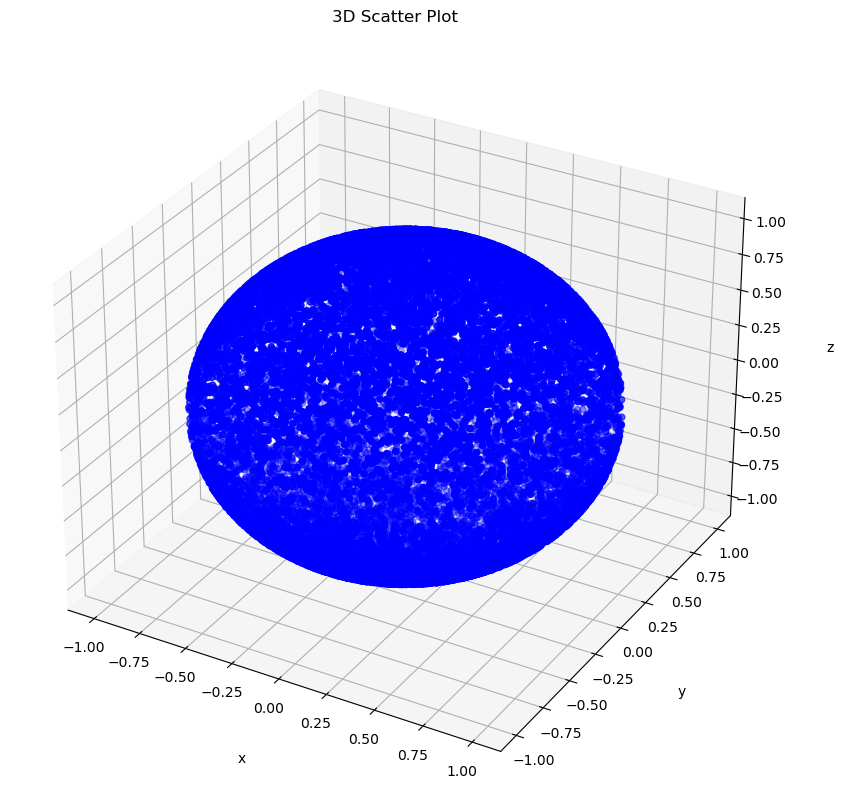

In [249]:
num_points = 20000
points = np.array([get_r3_point() for _ in range(num_points)])


x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

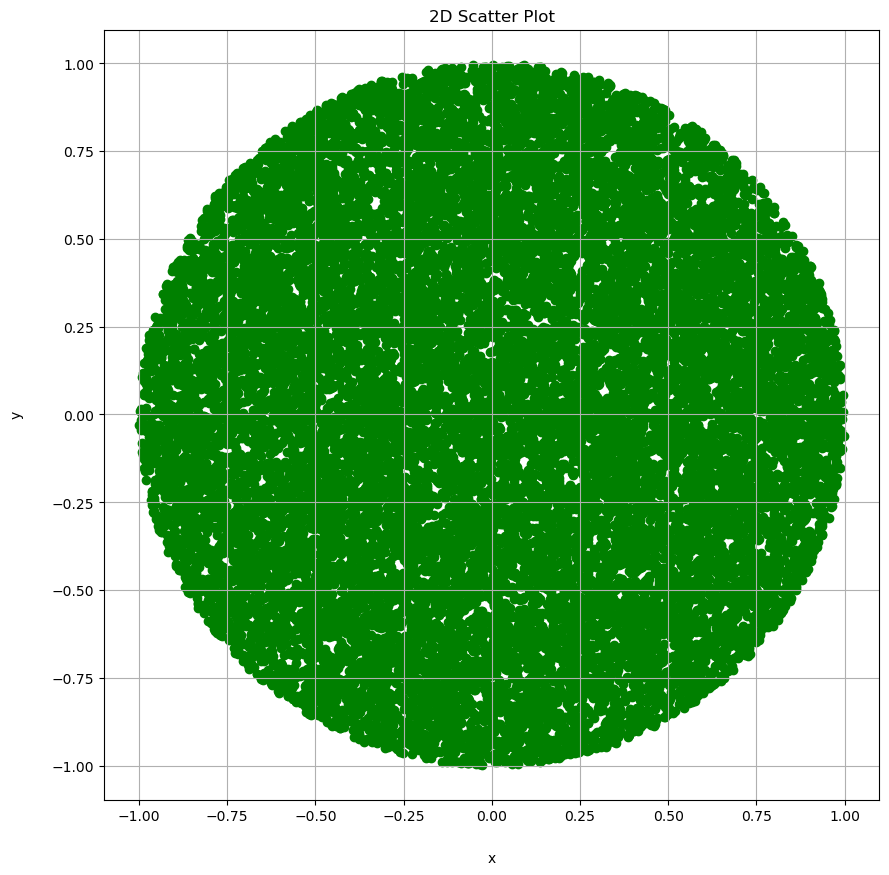

In [250]:
# num_points = 1000
# points = np.array([get_r2_point() for _ in range(num_points)])

x = points[:,0]
y = points[:,1]

fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.grid()

ax.scatter(x, y, c = 'g',)
ax.set_title('2D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/2438098680.py:9: RuntimeWarning: invalid value encountered in sqrt
  x_3 = c * np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/2438098680.py:15: RuntimeWarning: invalid value encountered in sqrt
  x_3 = c * np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


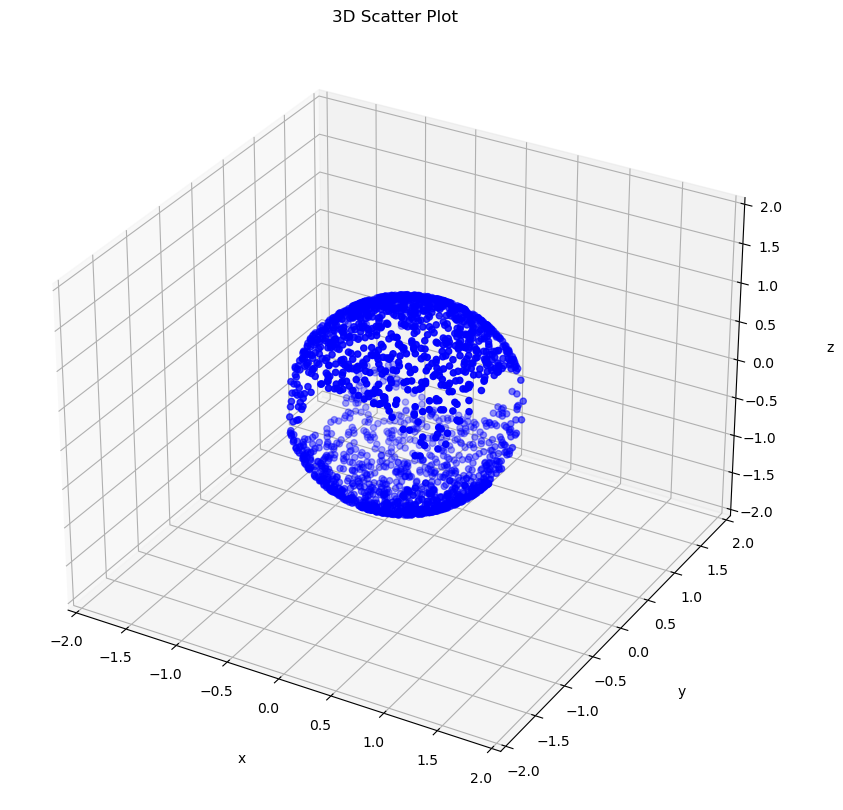

In [235]:
# let's look at other shapes: ellipsoid

def get_3d_ellipsoid_point():
    a = 1.2
    b = 1.2
    c = 1.2
    x_1 = sample() / a
    x_2 = sample() / b
    x_3 = c * np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
    sign = np.random.choice([1, -1]) # randomly flip sign
    x_3 *= sign    
    while np.isnan(x_3): # sometimes 1 - rest < 0
        x_1 = sample() / a
        x_2 = sample() / b
        x_3 = c * np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
        sign = np.random.choice([1, -1]) # "
        x_3 *= sign
    return np.array([x_1, x_2, x_3])


num_points = 2000
points = np.array([get_3d_ellipsoid_point() for _ in range(num_points)])


x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.show()

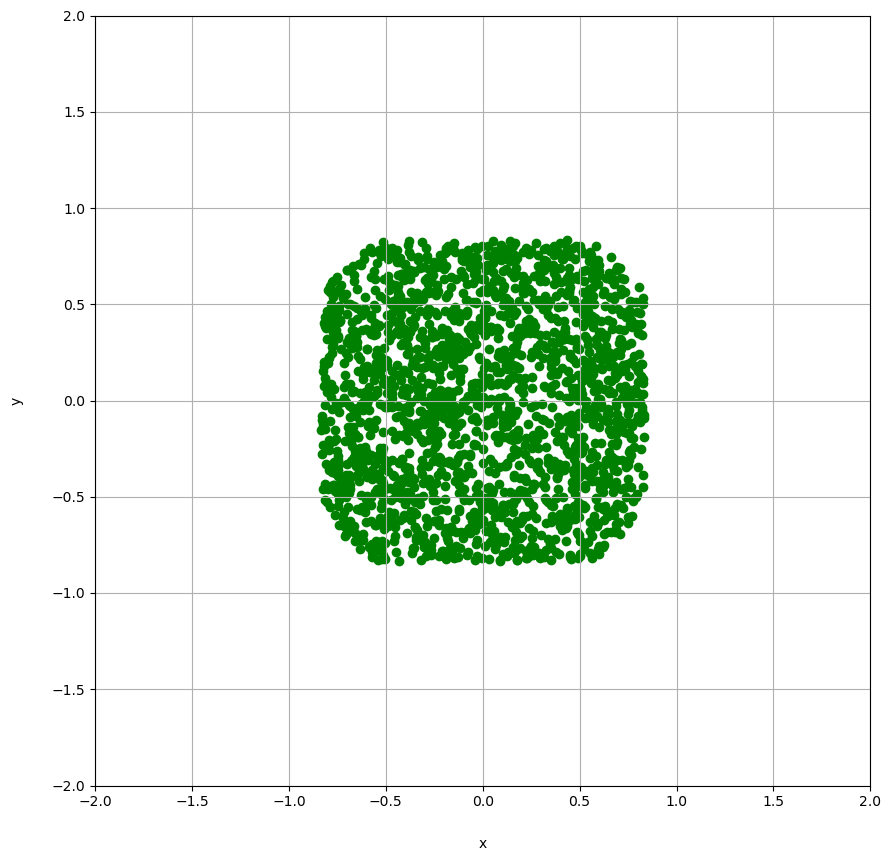

In [237]:
# project down
x = points[:,0]
y = points[:,1]

fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.grid()

ax.scatter(x, y, c = 'g',)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.show()

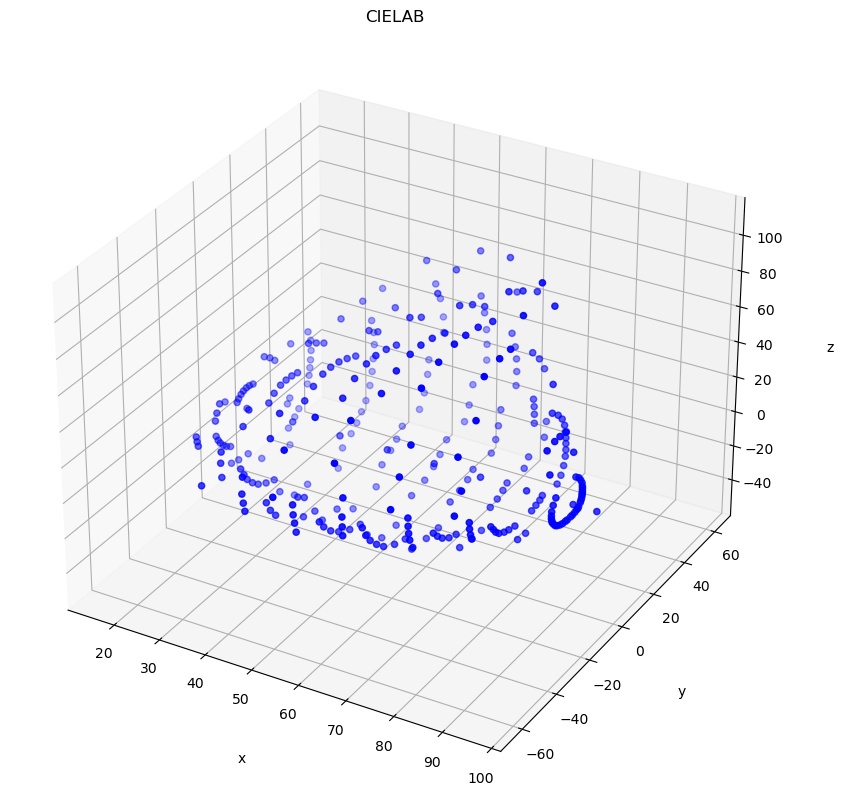

In [229]:
# visualize CIELAB!
import pandas as pd
fn = "cnum-vhcm-lab-new.txt"
data = pd.read_csv(fn, sep="\t")
points = data[["L*","a*","b*"]].to_numpy()

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('CIELAB')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

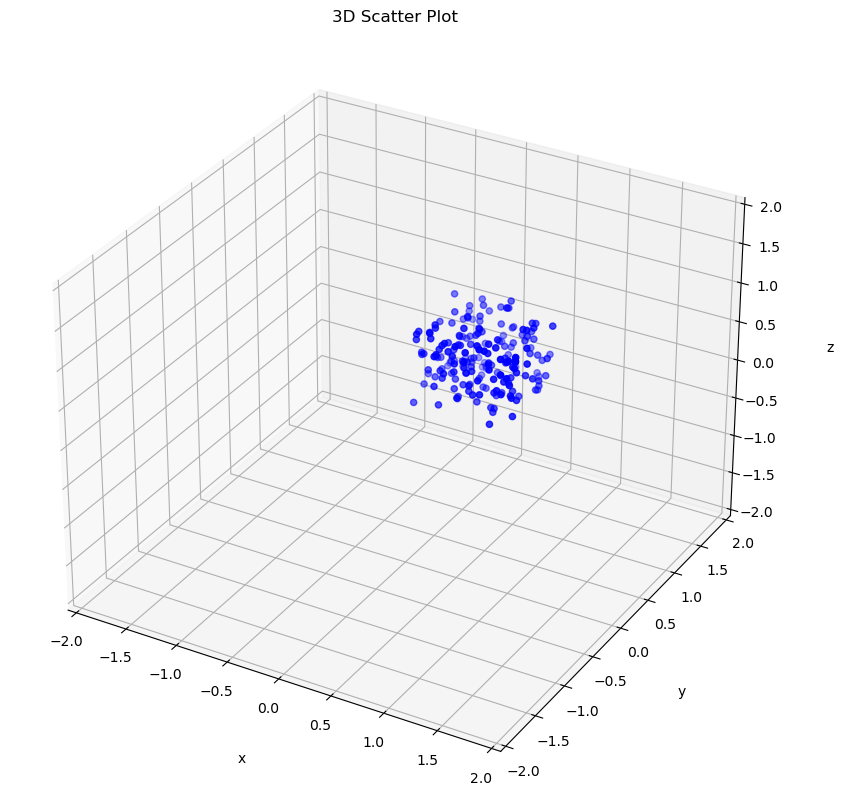

In [231]:
# cube
num_points = 200
x = np.random.random(num_points)
y = np.random.random(num_points)
z = np.random.random(num_points)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

plt.show()

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/2889091534.py:7: RuntimeWarning: invalid value encountered in sqrt
  x_4 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2 - x_3**2 )
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/2889091534.py:14: RuntimeWarning: invalid value encountered in sqrt
  x_4 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2 - x_3**2 )


array([ 0.56657001,  0.79557357,  0.30019069, ..., -0.26243844,
       -0.45400184,  0.47917949])

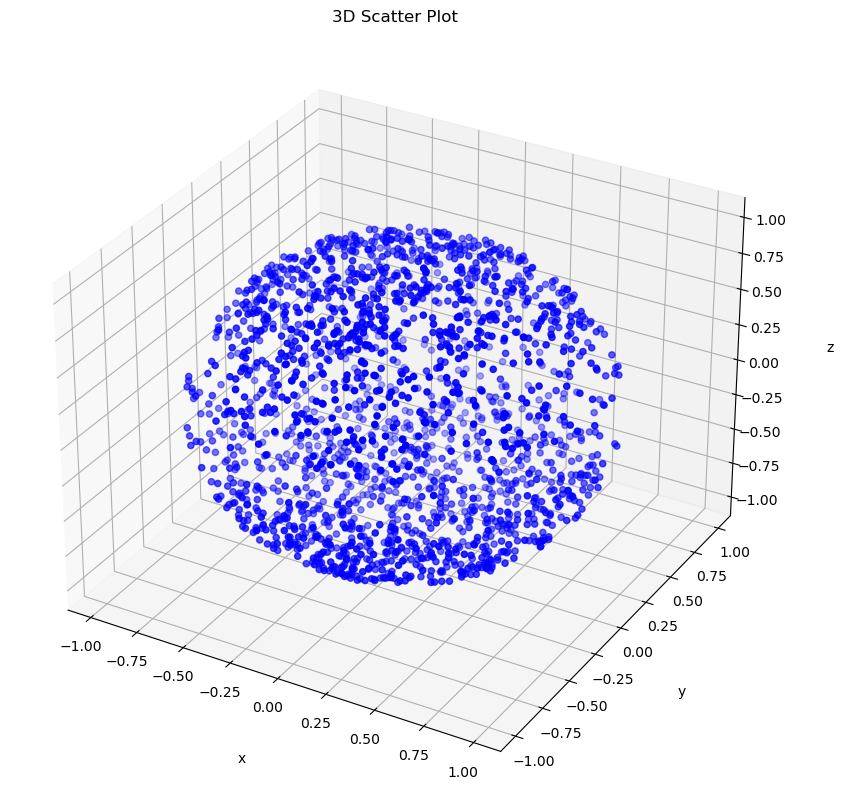

In [280]:
# test 3sphere (4dims) projected down to 3D: should fill in the sphere.

def get_r4_point():
    x_1 = sample()
    x_2 = sample()
    x_3 = sample()
    x_4 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2 - x_3**2 )
    sign = np.random.choice([1, -1]) # randomly flip sign
    x_4 *= sign
    while np.isnan(x_4): # sometimes 1 - rest < 0
        x_1 = sample()
        x_2 = sample()
        x_3 = sample()
        x_4 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2 - x_3**2 )
        sign = np.random.choice([1, -1]) # randomly flip sign
        x_4 *= sign
    return np.array([x_1, x_2, x_3, x_4])


num_points = 2000
points = np.array([get_r4_point() for _ in range(num_points)])

# leave off first dim; must have the solved coord among to generate sphere, not cube
x = points[:,1]
y = points[:,2]
z = points[:,3]


fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
# ax = plt.axes()
ax.grid()

ax.scatter(x, y, z, c = 'b',)
# ax.scatter(y,z, c='g')
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

# ax.set_xlim(-2, 2)
# ax.set_ylim(-2, 2)
# ax.set_zlim(-2, 2)

plt.show()

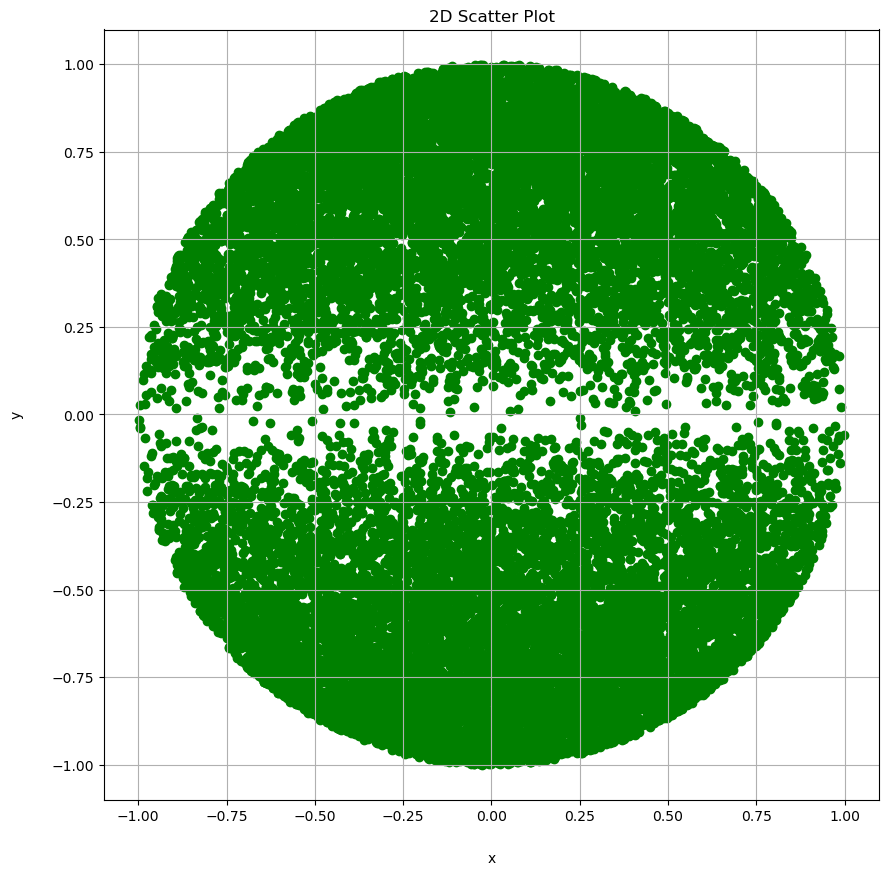

In [255]:
x = points[:,-2]
y = points[:,-1]

fig = plt.figure(figsize = (10,10))
ax = plt.axes()
ax.grid()

ax.scatter(x, y, c = 'g',)
ax.set_title('2D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

In [ ]:
# i don't understand why its sparse in the middle.
# i'm just going to write a more general func and see what happens

In [399]:
def sample():
   a = 0 + 1e-4
   b = 1 + 1e-4
   sign = np.random.choice([1, -1]) # randomly flip sign
   return sign * (b - a) * np.random.sample() + a

def get_r3_point():
    x_1 = sample()
    x_2 = sample()
    x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
    sign = np.random.choice([1, -1]) # randomly flip sign
    x_3 *= sign    
    while np.isnan(x_3): # sometimes 1 - rest < 0
        x_1 = sample()
        x_2 = sample()
        x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
        sign = np.random.choice([1, -1]) # "
        x_3 *= sign
    return np.array([x_1, x_2, x_3])


rand_sign = lambda: random.choice([1, -1])

def sample_scalar(a = 0, b = 1):
    return rand_sign() * (b - a) * torch.rand(1) + a

def solve_coord(coords: torch.Tensor) -> torch.Tensor:
    return torch.sqrt(  -1 * (coords ** 2).sum(dim=-1)  + 1 )

def get_nsphere_point(n = 2):
    """Gets a point on the nsphere, checking for nans."""
    coord = torch.nan
    while coord != coord: # nan
        sampled_points = torch.tensor([sample_scalar() for _ in range(n-1)])
        coord = solve_coord(sampled_points)
    coord *= rand_sign()
    return torch.concat([sampled_points, torch.tensor([coord])])

def nball_points(
    n: int, 
    num_samples: int,
    # radius: float = 1., 
    # center: float = 0.,
    ) -> torch.Tensor:
    """Uniformly sample random points contained within an n-sphere."""
    num_samples = int(num_samples / 2) # divide between surface and mids
    # get points on surface of nsphere
    surface_points = torch.stack([get_nsphere_point(n) for _ in range(num_samples)])
    # get random midpoints between points on this surface
    midpoints = torch.stack([(surface_points[random.choice(range(num_points))] + surface_points[random.choice(range(num_points))])/2 for _ in range(num_points)])
    points = torch.vstack([surface_points, midpoints])
    points = midpoints
    return points


def plot_3d_points(points):
    x = points[:,-3]
    y = points[:,-2]
    z = points[:,-1]

    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    ax.grid()

    ax.scatter(x, y, z, c = 'b',)
    ax.set_title('3D Scatter Plot')

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)

    plt.show()

def plot_2d_points(points):
    x = points[:,-2]
    y = points[:,-1]

    fig = plt.figure(figsize = (10,10))
    ax = plt.axes()
    ax.grid()

    ax.scatter(x, y, c = 'g',)
    ax.set_title('2D Scatter Plot')

    # Set axes label
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    plt.show()    

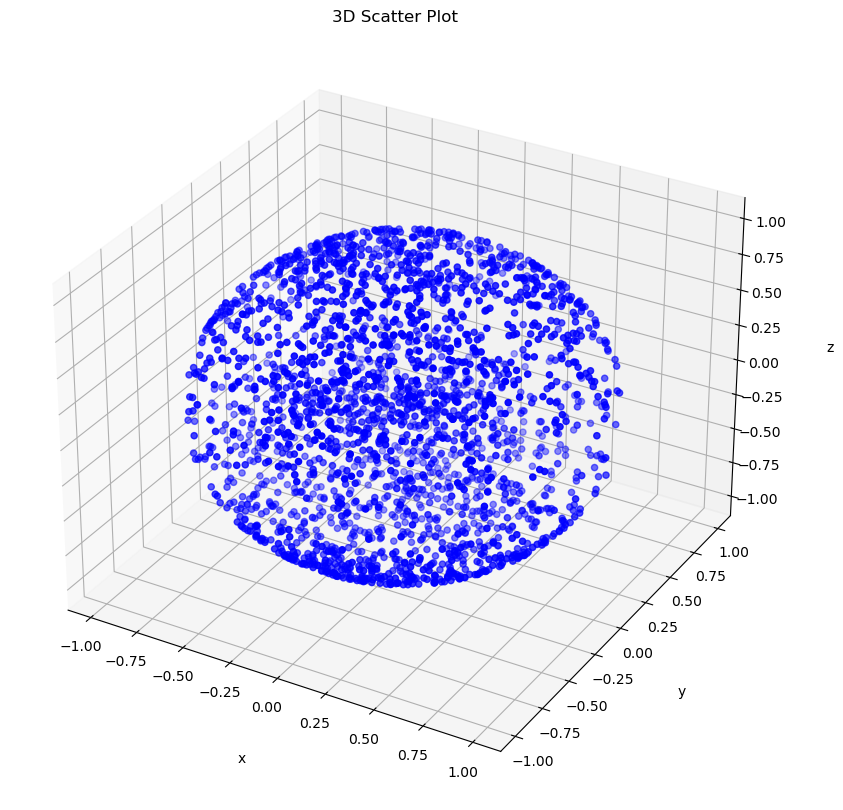

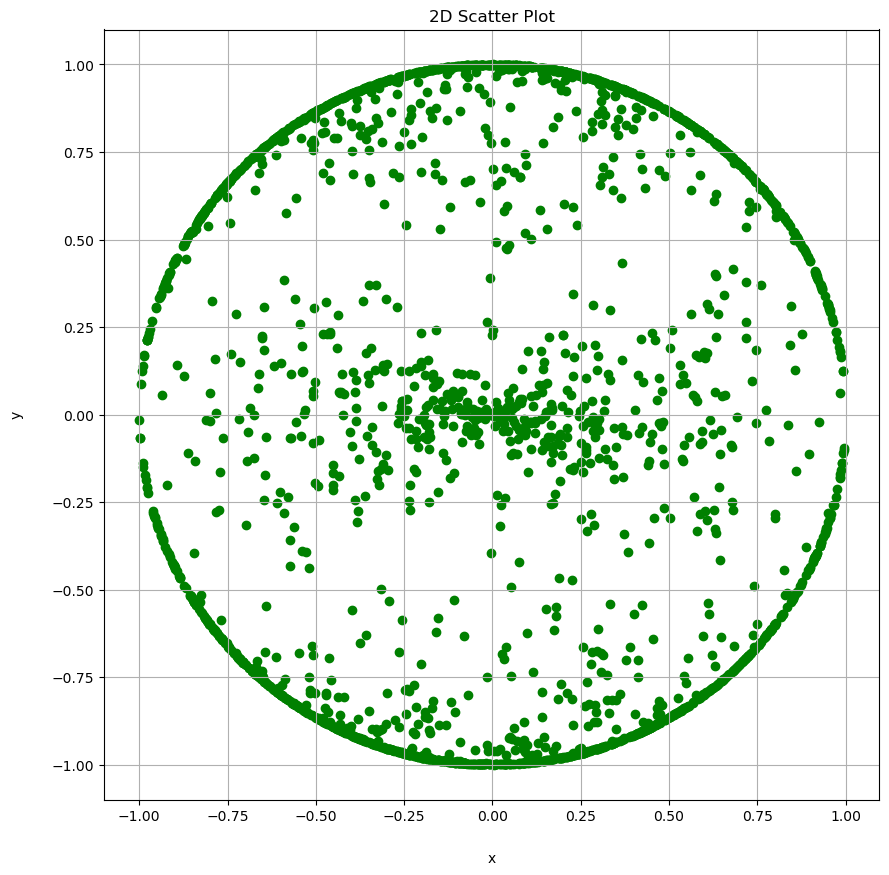

In [400]:
plot_3d_points(nball_points(3, 3000))
plot_2d_points(nball_points(2, 3000))

In [366]:
sampled_points = torch.tensor([sample_scalar() for _ in range(2)])
coord = solve_coord(sampled_points)
coord
torch.concat([sampled_points, torch.tensor([coord])])

tensor([-0.1292, -0.3353,  0.9332])

In [289]:
sampled_points = torch.randn(1, 2)
solved_points = torch.sqrt(1 - torch.sum(sampled_points ** 2, dim=-1)) # contains nans
solved_points

tensor([nan])

In [293]:
1 - (sampled_points ** 2).sum()

tensor(-0.0135)

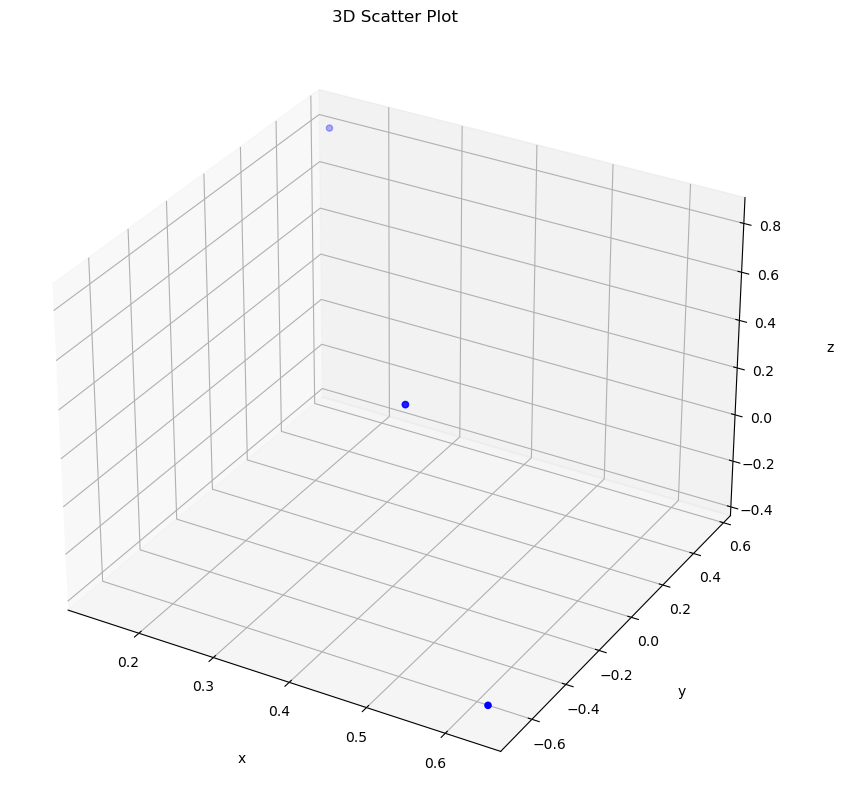

In [329]:
num_points = 2
# num_points = int(num_points / 2)
# surface points
surface_points = np.array([get_r3_point() for _ in range(num_points)])

# sample random midpoints by choosing two surface points and taking their mean
midpoints = np.array([(surface_points[0] + surface_points[1])/2 for _ in range(num_points)])

points = np.vstack([surface_points, midpoints])


x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()


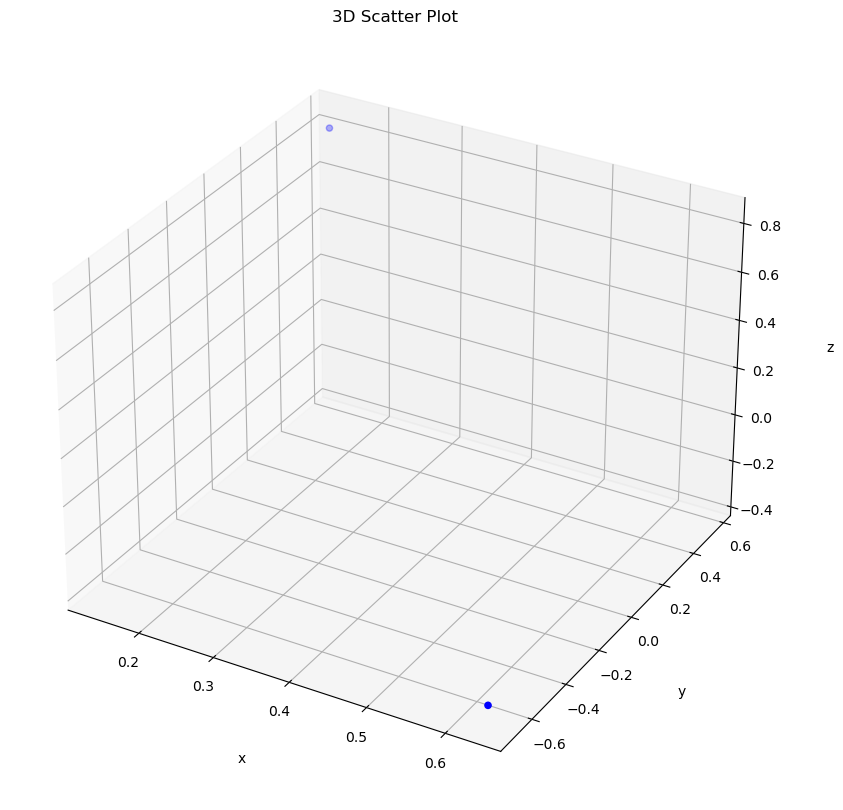

In [330]:
points = surface_points
x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:15: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)
/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_7811/966499284.py:21: RuntimeWarning: invalid value encountered in sqrt
  x_3 = np.sqrt( np.sqrt(1 + 1e-4) - x_1**2 - x_2**2)


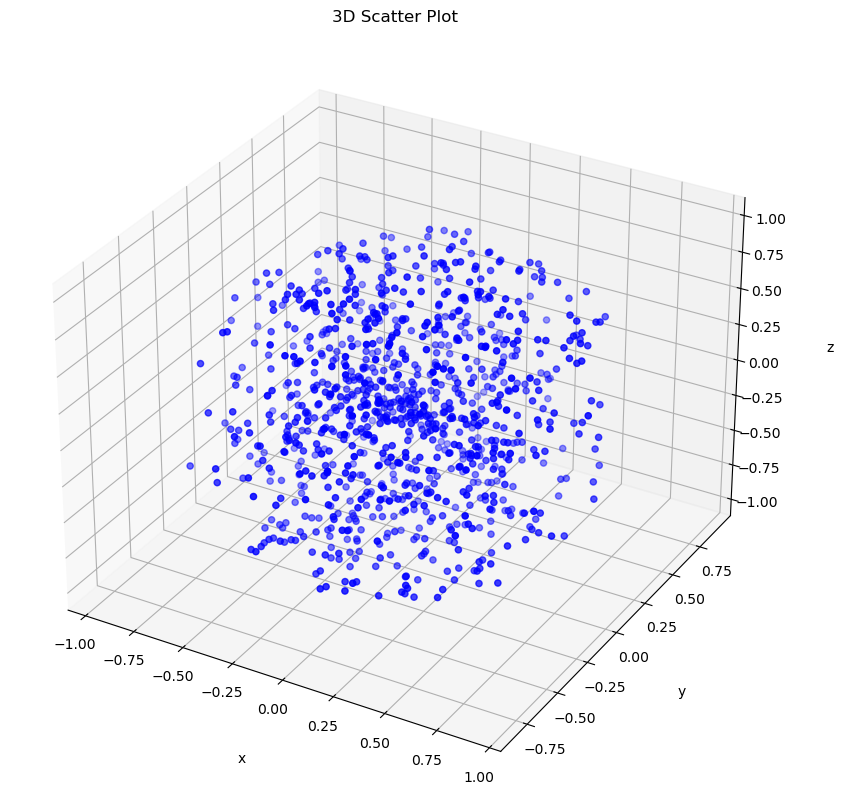

In [343]:
num_points = 2000
num_points = int(num_points / 2)
# surface points
surface_points = np.array([get_r3_point() for _ in range(num_points)])

# sample random midpoints by choosing two surface points and taking their mean
midpoints = np.array([(surface_points[random.choice(range(num_points))] + surface_points[random.choice(range(num_points))])/2 for _ in range(num_points)])

# points = np.vstack([surface_points, midpoints])
points = midpoints
# points = surface_points


x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(x, y, z, c = 'b',)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()


3